In [1]:
import pandas as pd

# 1. Загрузить файл hr.csv.

In [2]:
data = pd.read_csv('HR.csv')

# 2. Рассчитать основные статистики для переменных

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
columns_for_statistic = data.loc[:, :'promotion_last_5years'].columns

In [5]:
statistic = pd.DataFrame(index=['mean', 'median', 'mode', 'min', 'max', 'mean_deviation'], 
                         columns=columns_for_statistic)

for col in columns_for_statistic:
    statistic[col]['mean'] = data[col].mean()
    statistic[col]['median'] = data[col].median()
    statistic[col]['mode'] = data[col].mode()
    statistic[col]['min'] = data[col].min()
    statistic[col]['max'] = data[col].max()
    statistic[col]['mean_deviation'] = sum(abs(data[col] - data[col].mean()))/len(data[col])


In [6]:
statistic

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.612834,0.716102,3.80305,201.05,3.49823,0.14461,0.238083,0.0212681
median,0.64,0.72,4,200,3,0,0,0
mode,0 0.1 dtype: float64,0 0.55 dtype: float64,0 4 dtype: int64,0 135 1 156 dtype: int64,0 3 dtype: int64,0 0 dtype: int64,0 0 dtype: int64,0 0 dtype: int64
min,0.09,0.36,2,96,2,0,0,0
max,1,1,7,310,10,1,1,1
mean_deviation,0.206911,0.150389,1.00834,43.6713,1.07612,0.247395,0.362798,0.0416315


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [7]:
#import matplotlib.pyplot as plt
import seaborn as sns

# Корреляционная матрица
corr = data[columns_for_statistic].corr()

# Визуализация

sns.heatmap(corr, 
           xticklabels=corr.columns,
           yticklabels=corr.columns)

# 4. Визуализировать несколько взаимосвязей между переменными.

C:\Users\Surkov\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


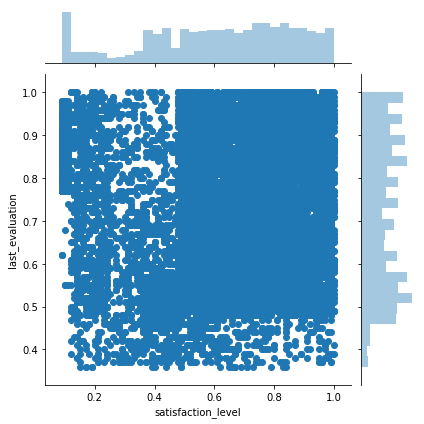

In [8]:
sns.jointplot(data['satisfaction_level'], data['last_evaluation']);

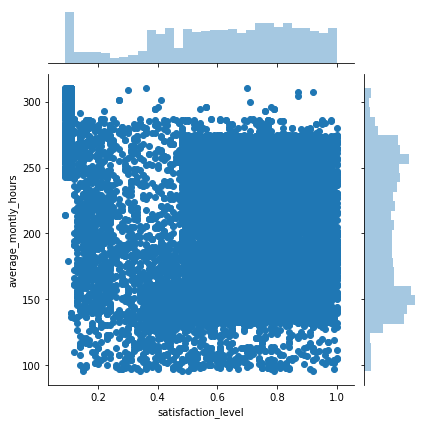

In [9]:
sns.jointplot(data['satisfaction_level'], data['average_montly_hours']);

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [10]:
from scipy import stats

stats.ttest_ind(data['satisfaction_level'], data['last_evaluation'])

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)

In [11]:
stats.ttest_ind(data['Work_accident'], data['left'])

Ttest_indResult(statistic=-20.724471296371643, pvalue=9.625063899986344e-95)

# 6. Рассчитать сколько работников работает в каждом департаменте.

In [12]:
count_employee = data['sales'].value_counts()
count_employee

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

# 7. Показать распределение сотрудников по зарплатам.

In [13]:
hist_salary = data['salary'].value_counts()

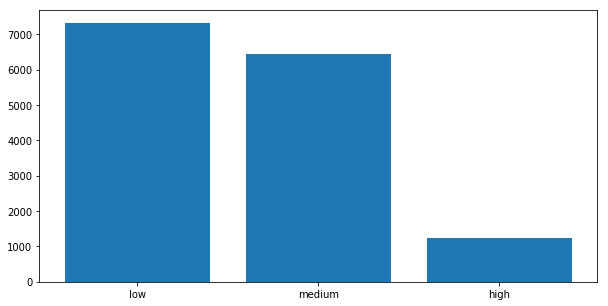

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.bar(hist_salary.index, hist_salary);

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [15]:
hist_salary_and_department = pd.DataFrame(index=data['sales'].unique(), columns=data['salary'].unique())

In [16]:
for depatrment in hist_salary_and_department.index:
    hist_salary_and_department.loc[depatrment] = data[data['sales']==depatrment]['salary'].value_counts()
    
hist_salary_and_department

,low,medium,high
sales,2099,1772,269
accounting,358,335,74
hr,335,359,45
technical,1372,1147,201
support,1146,942,141
management,180,225,225
IT,609,535,83
product_mng,451,383,68
marketing,402,376,80
RandD,364,372,51


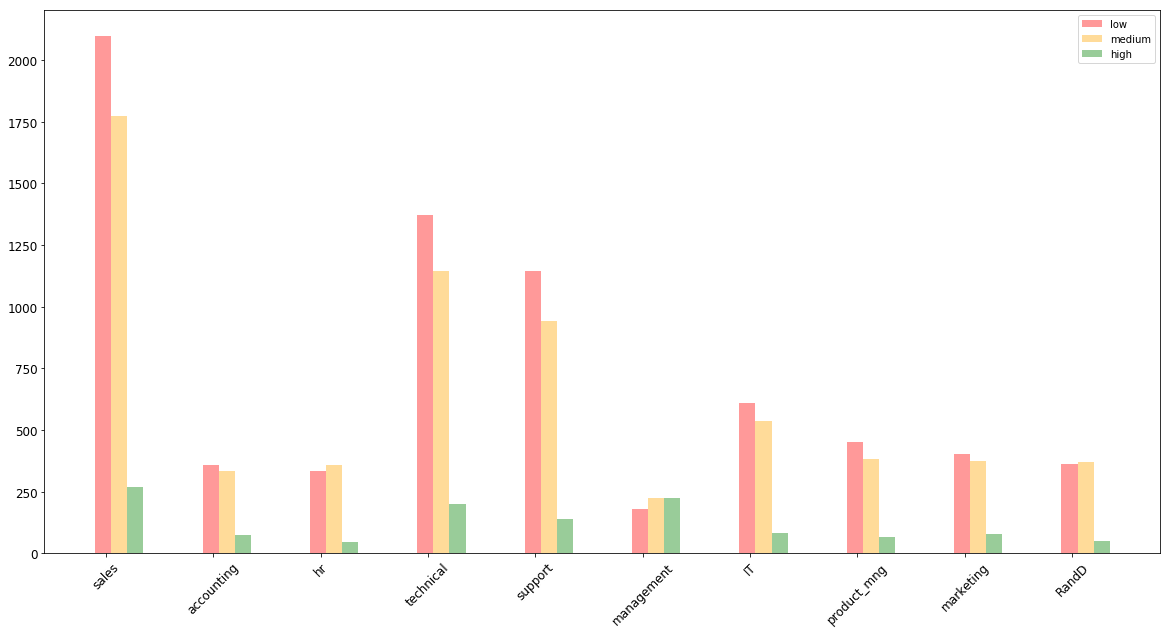

In [17]:
pos = list(range(len(hist_salary_and_department)))
width = 0.15

plt.figure(figsize = (20, 10))

bar_1 = plt.bar([p + width + 0.05 for p in pos],
                hist_salary_and_department['low'], width,
                label='low',
                color="red", 
                alpha=0.4)

bar_2 = plt.bar([p + width*2 + 0.05 for p in pos], 
                hist_salary_and_department['medium'], 
                width, 
                label='medium', 
                color="orange",
                alpha=0.4)

bar_3 = plt.bar([p + width*3 + 0.05 for p in pos],
                hist_salary_and_department['high'],
                width, label='high',
                color="g",
                alpha=0.4)

plt.xticks([p + 1.5 * width for p in pos], labels=hist_salary_and_department.index,  rotation=45, fontsize=12);
plt.yticks(fontsize=12)
plt.legend();

# 9. Сколько сотрудников покинули компанию.

In [18]:
data['left'].value_counts()

# 3571 сотрудников покинули компанию

0    11428
1     3571
Name: left, dtype: int64

# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [19]:
# Гипотеза №1: Проверить как зависит уход сотрудника из компании от заработной платы.

data_left = pd.DataFrame(index=data['left'].unique(), columns=data['salary'].unique())

for left in data_left.index:
    data_left.loc[left] = data[data['left']==left]['salary'].value_counts()

In [20]:
data_left

# Как видно из таблицы 'data_left' чаще увольняются люди с низкой и средней заработной платой. 
# Возможно, данные уровни заработной платы не устраивали сотрудников и это послужило причиной ухода.

,low,medium,high
1,2172,1317,82
0,5144,5129,1155


In [21]:
# Гипотеза №2: Проверить как зависит уход сотрудника из компании от уровня удовлетворенности.
# Значение удовлетворенности лежит в диапазоне от 0 до 1.
# Для проверки данной гипотезы возьмем средние значения удовлетворенности по классам - 
#                                                                            "Ушел из компании" и "Остался в компании"


mean_left = data[data['left']==1]['satisfaction_level'].mean()
mean_dont_left = data[data['left']==0]['satisfaction_level'].mean()

print(' Удовлетворенность покинувших компанию: ', round(mean_left, 3), '\n',
      'Удовлетворенность не покинувших компанию: ', round(mean_dont_left, 3))

# Как видно из данны, в среднем у людей покинувших компанию удовлетворенность ниже, чем у людей оставшихся в компании.
# Можно утверждать, что в среднем люди уходят из компании из-за низкой удовлетворенности.

 Удовлетворенность покинувших компанию:  0.44 
 Удовлетворенность не покинувших компанию:  0.667
